In [65]:
import pandas as pd
college = pd.read_csv('/Users/shuozhang/Desktop/kaggle/college.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [66]:
college.shape

(777, 18)

In [67]:
college.dtypes

Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [68]:
college.isnull().any(axis=0)

Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

In [69]:
# change private to dummy variables
Private= pd.get_dummies(college.Private, prefix='Private_')
Private.head()

,Private__No,Private__Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [70]:
college = pd.concat([college.drop('Private',1),Private[Private.columns[1:]]],axis=1)
college.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private__Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [71]:
x=college.drop('Apps', axis=1)

In [72]:
x.head()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private__Yes
0,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [73]:
x.describe()

,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private__Yes
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.727156
std,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.445708
min,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,1.000000
75%,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


In [74]:
# VIF
import numpy as np
cc = np.corrcoef(x, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal() 

array([ 7.13601965, 21.36541157,  6.92918473,  5.6312131 , 18.01799721,
        1.71343126,  4.20556775,  2.00731787,  1.1087443 ,  1.30517093,
        4.10425836,  4.02629562,  1.89671733,  1.84925428,  2.97539196,
        1.83624933,  2.69989642])

In [75]:
vif=pd.DataFrame(x.columns,columns=['Feature'])
vif['VIF']=VIF.diagonal() 
vif

,Feature,VIF
0,Accept,7.136020
1,Enroll,21.365412
2,Top10perc,6.929185
3,Top25perc,5.631213
4,F.Undergrad,18.017997
5,P.Undergrad,1.713431
6,Outstate,4.205568
7,Room.Board,2.007318
8,Books,1.108744
9,Personal,1.305171


In [76]:
x.shape

(777, 17)

In [77]:
x.columns

Index(['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private__Yes'],
      dtype='object')

In [78]:
x2=x.drop(['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad'], axis=1)

In [79]:
x2.shape

(777, 12)

In [80]:
x2.columns

Index(['P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate',
       'Private__Yes'],
      dtype='object')

In [81]:
y=college['Apps']

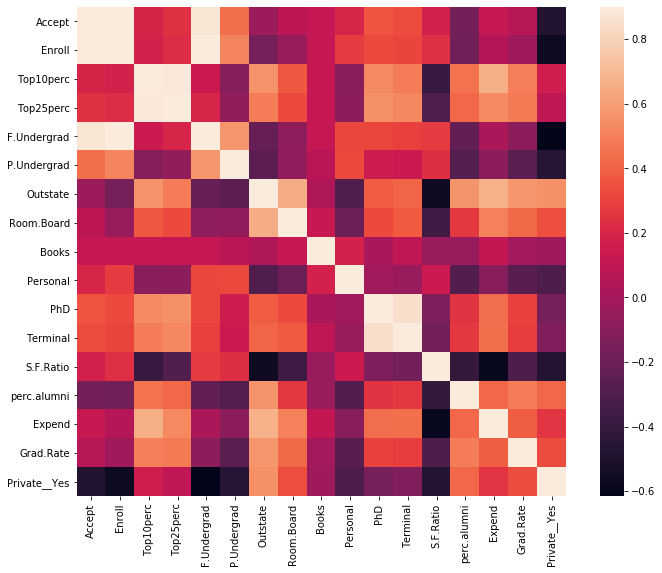

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = x.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # for ridge/lasso
# include all variables

In [86]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.2, random_state=42) # for mlp
# drop high correlated variables

In [88]:
# fit the model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X_train2, y_train2)

LinearRegression()

In [89]:
colnames = X_train2.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
P.Undergrad,0.733880
Outstate,0.047647
Room.Board,0.338865
Books,1.332546
Personal,0.159917
PhD,17.043428
Terminal,2.804421
S.F.Ratio,90.096246
perc.alumni,-31.146643
Expend,0.191340


In [91]:
from sklearn.metrics import mean_squared_error
print( 'for mlp, testing error:', mean_squared_error(y_test, ols.predict(X_test2)))

for mlp, testing error: 5835749.554295457


In [94]:
# ridge
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
para_grid = [{'alpha': np.logspace(0, 8, 100)}]
ridge = linear_model.Ridge()
grid_search_ridge= GridSearchCV(ridge, para_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e+00, 1.20450354e+00, 1.45082878e+00, 1.74752840e+00,
       2.10490414e+00, 2.53536449e+00, 3.05385551e+00, 3.67837977e+00,
       4.43062146e+00, 5.33669923e+00, 6.42807312e+00, 7.74263683e+00,
       9.32603347e+00, 1.12332403e+01, 1.35304777e+01, 1.62975083e+01,
       1.96304065e+01, 2.36448941e+01, 2.84803587e+01, 3...
       1.38488637e+06, 1.66810054e+06, 2.00923300e+06, 2.42012826e+06,
       2.91505306e+06, 3.51119173e+06, 4.22924287e+06, 5.09413801e+06,
       6.13590727e+06, 7.39072203e+06, 8.90215085e+06, 1.07226722e+07,
       1.29154967e+07, 1.55567614e+07, 1.87381742e+07, 2.25701972e+07,
       2.71858824e+07, 3.27454916e+07, 3.94420606e+07, 4.75081016e+07,
       5.72236766e+07, 6.89261210e+07, 8.30217568e+07, 1.00000000e+08])}],
             scoring='neg_mean_squared_error')

In [95]:
print (grid_search_ridge.best_params_)

{'alpha': 11.233240329780276}


In [97]:
ridge = linear_model.Ridge(alpha=11.233240329780276)
ridge.fit(X_train, y_train)
print ('for ridge, testing error:', mean_squared_error(y_test, ridge.predict(X_test)))
#for mlp, testing error: 5835749.554295457

for ridge, testing error: 1477318.6496078877


In [98]:
colnames = X_train.columns
result = pd.DataFrame(ridge.coef_).transpose()
result.columns = colnames
result['intercept'] = ridge.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Accept,1.665405
Enroll,-1.025020
Top10perc,51.541191
Top25perc,-14.974279
F.Undergrad,0.059816
P.Undergrad,-0.024042
Outstate,-0.077181
Room.Board,0.153452
Books,0.106851
Personal,0.040464


In [99]:
# lasso
para_grid = [{'alpha': np.logspace(0, 8, 100)}]
lasso = linear_model.Lasso()
grid_search_lasso= GridSearchCV(lasso, para_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1.00000000e+00, 1.20450354e+00, 1.45082878e+00, 1.74752840e+00,
       2.10490414e+00, 2.53536449e+00, 3.05385551e+00, 3.67837977e+00,
       4.43062146e+00, 5.33669923e+00, 6.42807312e+00, 7.74263683e+00,
       9.32603347e+00, 1.12332403e+01, 1.35304777e+01, 1.62975083e+01,
       1.96304065e+01, 2.36448941e+01, 2.84803587e+01, 3...
       1.38488637e+06, 1.66810054e+06, 2.00923300e+06, 2.42012826e+06,
       2.91505306e+06, 3.51119173e+06, 4.22924287e+06, 5.09413801e+06,
       6.13590727e+06, 7.39072203e+06, 8.90215085e+06, 1.07226722e+07,
       1.29154967e+07, 1.55567614e+07, 1.87381742e+07, 2.25701972e+07,
       2.71858824e+07, 3.27454916e+07, 3.94420606e+07, 4.75081016e+07,
       5.72236766e+07, 6.89261210e+07, 8.30217568e+07, 1.00000000e+08])}],
             scoring='neg_mean_squared_error')

In [100]:
print (grid_search_lasso.best_params_)

{'alpha': 7.742636826811272}


In [102]:
lasso = linear_model.Lasso(alpha=7.742636826811272)
lasso.fit(X_train, y_train)
print ('for lasso, testing error:', mean_squared_error(y_test, lasso.predict(X_test)))
#for ridge, testing error: 1477318.6496078877

for lasso, testing error: 1480422.0398325874


In [103]:
colnames = X_train.columns
result = pd.DataFrame(lasso.coef_).transpose()
result.columns = colnames
result['intercept'] = lasso.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Accept,1.665418
Enroll,-1.025637
Top10perc,51.307700
Top25perc,-14.786390
F.Undergrad,0.059241
P.Undergrad,-0.024677
Outstate,-0.076320
Room.Board,0.154356
Books,0.108939
Personal,0.040060


In [39]:
# ridge is best with lowest testing error.